In [30]:
import numpy as np
from sknetwork.clustering import Louvain, get_modularity
from sklearn.cluster import KMeans
from sknetwork.embedding import GSVD
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import svg_graph, svg_bigraph
import geopandas as gpd
import pandas as pd
from sklearn.metrics import silhouette_score

In [4]:
adj = np.loadtxt("GCC-part/adjacency_matrix.txt", comments="#", delimiter=" ", unpack=False)

In [5]:
adj

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [6]:
louvain = Louvain(n_aggregations=10)
labels = louvain.fit_transform(adj)

In [7]:
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [124 114 108  92  91  87  78  77  76  76  61  58  56  48  48  36  34  34
  33  24  18  17]


In [8]:
len(labels)

1390

In [9]:
get_modularity(adj, labels)

0.8715686934329964

In [10]:
geo = gpd.read_file("joined_data/WIct.shp")

In [11]:
simple = geo[["ct","geometry"]].copy()

In [14]:
simple

ct                                           geometry  labels
0     55001950100  POLYGON ((-89.92702 44.19367, -89.92679 44.194...       5
1     55001950201  POLYGON ((-90.01877 44.04772, -90.01870 44.048...       5
2     55001950202  POLYGON ((-90.02638 44.08721, -90.02627 44.089...       9
3     55001950400  POLYGON ((-89.93773 43.96629, -89.93738 43.966...       9
4     55001950501  POLYGON ((-89.98419 43.91181, -89.98397 43.913...       9
...           ...                                                ...     ...
1385  55141011300  POLYGON ((-89.85937 44.36194, -89.85928 44.362...      19
1386  55141011400  POLYGON ((-89.81719 44.38606, -89.81718 44.386...      19
1387  55141011500  POLYGON ((-89.80564 44.34373, -89.80245 44.347...      19
1388  55141011600  POLYGON ((-89.91256 44.27344, -89.91253 44.273...      19
1389  55141011700  POLYGON ((-89.92954 44.30861, -89.92958 44.308...      19

[1390 rows x 3 columns]

In [12]:
simple["labels"] = labels

<AxesSubplot:>

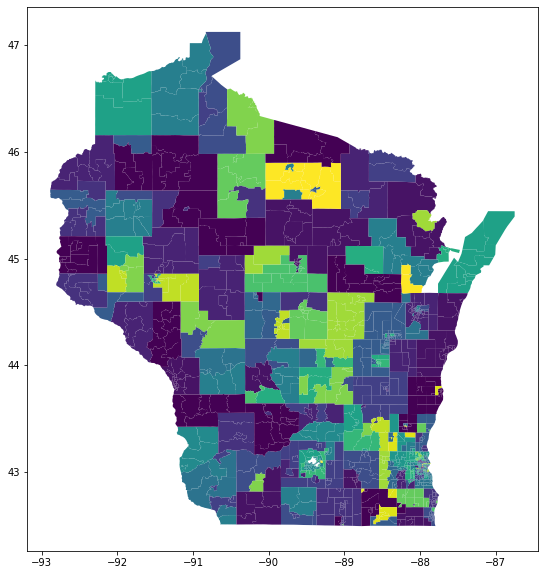

In [18]:
simple.plot(column="labels",figsize=(10,10))

In [19]:
df = pd.read_csv("joined_data/joined_data_CHR_simplified.csv")

In [20]:
sub = df[['poverty_score', 'median_age_no_insurance', 'hispanic_prop',
       'MFratio', 'household_median_income', 'white', 'black', 'native',
       'asian', 'hawaiian', 'Bachelor', 'Master', 'Doctorate', 'pop']]

In [21]:
attr = np.array(sub)

In [22]:
attr

array([[5.43144000e+03, 3.75000000e+01, 4.08858603e-03, ...,
        1.46000000e+02, 2.40000000e+01, 2.93500000e+03],
       [2.30987000e+03, 3.63829787e+01, 1.78704393e-02, ...,
        3.00000000e+01, 0.00000000e+00, 1.34300000e+03],
       [4.33765000e+03, 3.99230769e+01, 2.78961643e-02, ...,
        5.80000000e+01, 3.00000000e+00, 2.58100000e+03],
       ...,
       [1.11261100e+04, 3.03876404e+01, 6.85753472e-03, ...,
        3.24000000e+02, 6.40000000e+01, 5.83300000e+03],
       [8.85504000e+03, 4.12140411e+01, 0.00000000e+00, ...,
        1.60000000e+02, 0.00000000e+00, 5.04200000e+03],
       [7.24562000e+03, 3.16646778e+01, 2.86539316e-02, ...,
        1.75000000e+02, 1.20000000e+01, 4.50200000e+03]])

In [23]:
silhouette_score(attr, labels)

-0.23801604586074807

In [31]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(attr)
kmeans.labels_

array([ 8,  2,  2, ..., 11,  0, 14], dtype=int32)

In [32]:
unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)
print(unique_labels, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [ 87  59 139  62  58   8  99  18 114 153  43  67  63 126  76  94  63   2
  42  17]


In [33]:
get_modularity(adj, kmeans.labels_)

0.17339302243573934

In [34]:
simple["labels"] = kmeans.labels_

<AxesSubplot:>

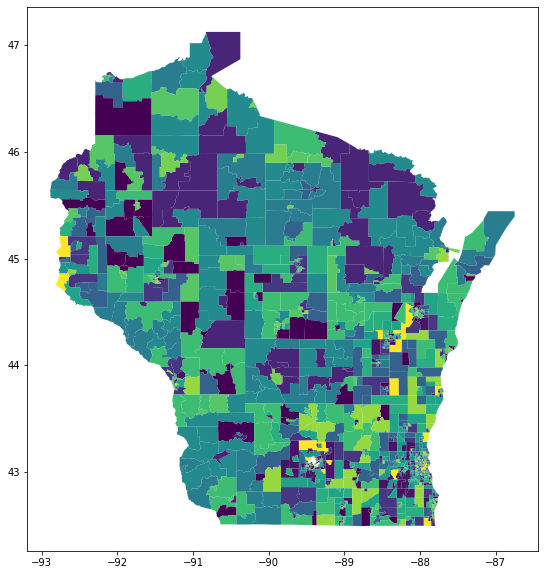

In [35]:
simple.plot(column="labels",figsize=(10,10))

In [36]:
silhouette_score(attr, kmeans.labels_)

0.3251908741712026